In [3]:
import pandas as pd
from datetime import datetime
import numpy as np
import math
from bokeh.io import output_notebook
from bokeh.charts import Line, show, TimeSeries
from bokeh.models import DatetimeTickFormatter
from bokeh.plotting import figure
%matplotlib inline

import filenames
df = pd.read_csv(filenames.giving_dfile, index_col='id')

In [4]:
output_notebook()

Loading BokehJS ...

In [5]:
df.head()

,first appeal date,first gift date,first gift amount,second gift date,second gift amount,total given,total number of gifts,average gift amount,largest gift amount,smallest gift amount,total unsolicited gifts
id,,,,,,,,,,,
10002589,11/16/2011,8/16/2011,$25.00,8/19/2013,$100.00,$275.00,4.0,$68.75,$100.00,$25.00,0.0
10002626,NaN,12/15/2011,$10.00,NaN,NaN,$10.00,1.0,$10.00,$10.00,$10.00,0.0
10008513,3/9/2012,12/15/2011,$50.00,1/31/2015,$15.00,$310.00,19.0,$16.32,$50.00,$10.00,0.0
10011462,3/9/2012,12/15/2011,$250.00,12/1/2013,$500.00,"$2,770.00",5.0,$554.00,"$1,020.00",$250.00,0.0
10018977,NaN,4/21/2012,$500.00,NaN,NaN,$500.00,1.0,$500.00,$500.00,$500.00,0.0


In [6]:
tseries = ['first appeal date', 'first gift date', 'second gift date']
for ts in tseries:
    df.loc[:,ts] = pd.to_datetime(df.loc[:,ts])
df.dtypes

first appeal date          datetime64[ns]
first gift date            datetime64[ns]
first gift amount                  object
second gift date           datetime64[ns]
second gift amount                 object
total given                        object
total number of gifts             float64
average gift amount                object
largest gift amount                object
smallest gift amount               object
total unsolicited gifts           float64
dtype: object

In [7]:
df.head()

,first appeal date,first gift date,first gift amount,second gift date,second gift amount,total given,total number of gifts,average gift amount,largest gift amount,smallest gift amount,total unsolicited gifts
id,,,,,,,,,,,
10002589,2011-11-16,2011-08-16,$25.00,2013-08-19,$100.00,$275.00,4.0,$68.75,$100.00,$25.00,0.0
10002626,NaT,2011-12-15,$10.00,NaT,NaN,$10.00,1.0,$10.00,$10.00,$10.00,0.0
10008513,2012-03-09,2011-12-15,$50.00,2015-01-31,$15.00,$310.00,19.0,$16.32,$50.00,$10.00,0.0
10011462,2012-03-09,2011-12-15,$250.00,2013-12-01,$500.00,"$2,770.00",5.0,$554.00,"$1,020.00",$250.00,0.0
10018977,NaT,2012-04-21,$500.00,NaT,NaN,$500.00,1.0,$500.00,$500.00,$500.00,0.0


In [8]:
donation_amounts = ['first gift amount', 'second gift amount', 'total given', 'average gift amount', 'largest gift amount',
                   'smallest gift amount']

In [9]:
for donation in donation_amounts:
    df.loc[:, donation] = df.loc[:, donation].replace('[$,]','', regex=True).astype(float).astype(float)

In [10]:
df.dtypes

first appeal date          datetime64[ns]
first gift date            datetime64[ns]
first gift amount                 float64
second gift date           datetime64[ns]
second gift amount                float64
total given                       float64
total number of gifts             float64
average gift amount               float64
largest gift amount               float64
smallest gift amount              float64
total unsolicited gifts           float64
dtype: object

In [11]:
df.head()

,first appeal date,first gift date,first gift amount,second gift date,second gift amount,total given,total number of gifts,average gift amount,largest gift amount,smallest gift amount,total unsolicited gifts
id,,,,,,,,,,,
10002589,2011-11-16,2011-08-16,25.0,2013-08-19,100.0,275.0,4.0,68.75,100.0,25.0,0.0
10002626,NaT,2011-12-15,10.0,NaT,NaN,10.0,1.0,10.00,10.0,10.0,0.0
10008513,2012-03-09,2011-12-15,50.0,2015-01-31,15.0,310.0,19.0,16.32,50.0,10.0,0.0
10011462,2012-03-09,2011-12-15,250.0,2013-12-01,500.0,2770.0,5.0,554.00,1020.0,250.0,0.0
10018977,NaT,2012-04-21,500.0,NaT,NaN,500.0,1.0,500.00,500.0,500.0,0.0


In [12]:
df['gave_second_time'] = np.where(df['second gift amount'].notnull(), 1, 0)

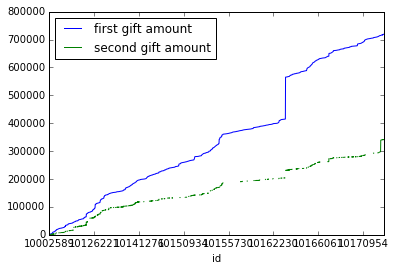

In [13]:
df.loc[:, ['first gift amount', 'second gift amount']].cumsum().plot(kind='line')

In [14]:
df = df[df['first gift date'].notnull()]

In [15]:
df[df['first gift date'].isnull()]

,first appeal date,first gift date,first gift amount,second gift date,second gift amount,total given,total number of gifts,average gift amount,largest gift amount,smallest gift amount,total unsolicited gifts,gave_second_time
id,,,,,,,,,,,,


In [16]:
df.head()

,first appeal date,first gift date,first gift amount,second gift date,second gift amount,total given,total number of gifts,average gift amount,largest gift amount,smallest gift amount,total unsolicited gifts,gave_second_time
id,,,,,,,,,,,,
10002589,2011-11-16,2011-08-16,25.0,2013-08-19,100.0,275.0,4.0,68.75,100.0,25.0,0.0,1
10002626,NaT,2011-12-15,10.0,NaT,NaN,10.0,1.0,10.00,10.0,10.0,0.0,0
10008513,2012-03-09,2011-12-15,50.0,2015-01-31,15.0,310.0,19.0,16.32,50.0,10.0,0.0,1
10011462,2012-03-09,2011-12-15,250.0,2013-12-01,500.0,2770.0,5.0,554.00,1020.0,250.0,0.0,1
10018977,NaT,2012-04-21,500.0,NaT,NaN,500.0,1.0,500.00,500.0,500.0,0.0,0


TypeError: unorderable types: numpy.ndarray() < str()

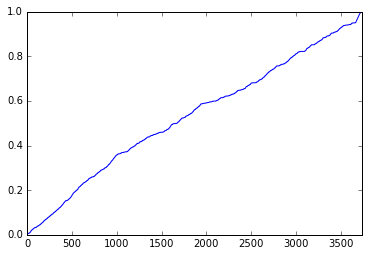

In [18]:
df['gave_second_time'].cumsum().divide(df['gave_second_time'].sum()).plot(rot=45, xticks='first appeal date')

In [19]:
df_time = df.sort_values(by='first gift date')

In [20]:
df_time['cum_pct_gave_twice'] = df_time['gave_second_time'].cumsum().divide(df_time['gave_second_time'].sum()).multiply(100)

In [21]:
df_time.tail()

,first appeal date,first gift date,first gift amount,second gift date,second gift amount,total given,total number of gifts,average gift amount,largest gift amount,smallest gift amount,total unsolicited gifts,gave_second_time,cum_pct_gave_twice
id,,,,,,,,,,,,,
10171265,NaT,2013-09-30,500.0,NaT,NaN,500.0,1.0,500.0,500.0,500.0,0.0,0,99.81982
10059094,NaT,2013-09-30,20.0,NaT,NaN,20.0,1.0,20.0,20.0,20.0,0.0,0,99.81982
10171264,NaT,2013-09-30,25.0,NaT,NaN,25.0,1.0,25.0,25.0,25.0,0.0,0,99.81982
10171206,NaT,2013-09-30,20.0,2013-10-30,20.0,940.0,40.0,23.5,100.0,20.0,0.0,1,99.90991
10171209,NaT,2013-09-30,50.0,2013-10-30,50.0,850.0,17.0,50.0,50.0,50.0,0.0,1,100.00000


In [22]:
#df_time['first gift date'] = pd.to_datetime(df['first gift date'], yearfirst=True)

In [23]:
df_time.dtypes

first appeal date          datetime64[ns]
first gift date            datetime64[ns]
first gift amount                 float64
second gift date           datetime64[ns]
second gift amount                float64
total given                       float64
total number of gifts             float64
average gift amount               float64
largest gift amount               float64
smallest gift amount              float64
total unsolicited gifts           float64
gave_second_time                    int64
cum_pct_gave_twice                float64
dtype: object

In [24]:
df_time.to_csv(filenames.giving)

In [31]:
df_t = df_time[['first gift date', 'cum_pct_gave_twice']]
df_t = df_t.set_index('first gift date')

In [32]:
p1 = TimeSeries(df_t)
show(p1)

<Bokeh Notebook handle for In[32] >

In [ ]:
df_

In [89]:
p = figure()
p.scatter(df_time['first gift date'], df_time['cum_pct_gave_twice'])
show(p)

In [76]:
df['first gift date']

id
10002589   2011-08-16
10002626   2011-12-15
10008513   2011-12-15
10011462   2011-12-15
10018977   2012-04-21
10028499   2012-04-21
10029916   2011-12-12
10030611   2011-05-26
10032089   2012-04-21
10035034   2011-12-27
10035572   2011-12-06
10036666   2013-06-03
10036856   2012-05-30
10036871   2012-07-17
10037218   2012-07-17
10037350   2012-05-21
10037367   2011-05-26
10037400   2013-04-20
10037562   2012-10-05
10037994   2012-10-02
10038171   2011-12-05
10038255   2011-04-19
10038274   2013-08-16
10038342   2011-05-07
10038438   2013-06-03
10038490   2013-06-03
10038717   2011-12-15
10038884   2012-12-05
10039769   2011-01-27
10039808   2013-06-03
              ...    
10204252   2011-08-18
10204257   2012-10-24
10204258   2013-01-15
10204428   2013-04-20
10204431   2011-06-10
10204444   2011-08-12
15504      2012-12-31
17139      2011-04-06
21981      2011-12-29
24605             NaT
28502      2012-12-19
295        2011-12-21
4280       2011-08-01
5932       2012-07-17
9660   

In [111]:
df_t.dropna(inplace=True)

In [112]:
df_t.tail()

,cum_pct_gave_twice
first gift date,
2013-09-30,99.81982
2013-09-30,99.90991
2013-09-30,100.00000
NaT,100.00000
NaT,100.00000
